In [7]:
#autoreload
%load_ext autoreload
%autoreload 2
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
im=np.zeros((300,300))

In [3]:
iml=cv2.line(im,(50,50),(65,90),0.6,3)

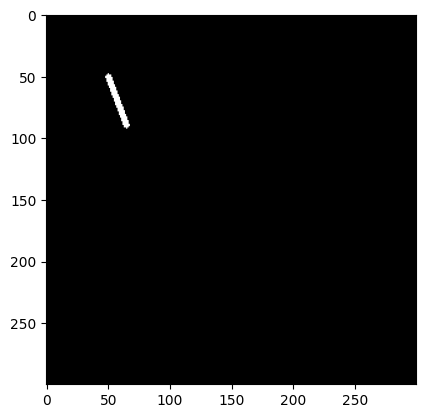

In [4]:
_=plt.imshow(iml,cmap='gray')

In [15]:
def spline(P0,P1,P2,t):
    return (1-t)*(1-t)*P0 +2*t*(1-t)*P1 + t*t*P2

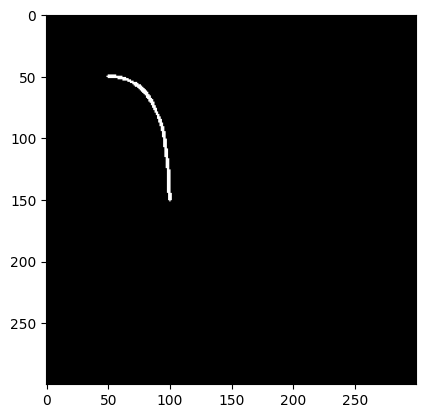

In [6]:
im=np.zeros((300,300))

P0=np.array([50.0,50])
P1=np.array([100.0,50])
P2=np.array([100.0,150])
puntos=[]
for t in np.linspace(0,1.0,20):
    p=spline(P0,P1,P2,t)
    puntos.append(p)
imp=cv2.polylines(im,[np.array(puntos).astype(np.int32)],False,0.6,2)
_=plt.imshow(imp>0,cmap='gray')

In [9]:
type(res[0]),type(res[1])

(numpy.ndarray, numpy.ndarray)

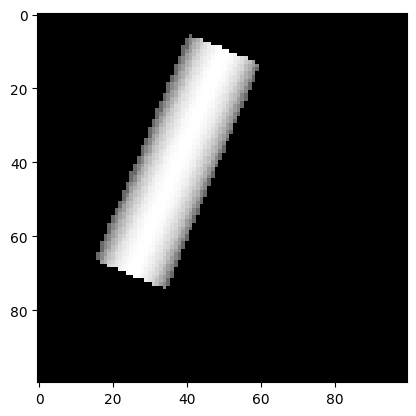

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x=np.zeros((100,100))
P0=np.array([50,10])
P1=np.array([25,70])

def draw_line(im,P0,P1,radio=2,color=1,flat=True):
    '''
    Modifica im
    '''
    #print("color=",color)
    d=np.sqrt(np.sum((P0-P1)**2))

    f=np.expand_dims(np.linspace(0,1,int(d)+10),0)
    
    v=np.expand_dims(P1-P0,1)
    #print(v)
    P0o=np.expand_dims(P0,1)

    puntos=P0o+f*v
    copia=im
    puntos=puntos

    vn=v/np.linalg.norm(v)
    w=np.array([-vn[1],vn[0]])#Perpendicular
    
    

    for e in np.linspace(-radio,radio,round(3*radio+1)):
        offset=e*w
        puntoso=np.round(puntos+offset).astype('int')
        #print(puntoso.shape,)
        if flat==False:
            d=math.sqrt((radio+1)**2-e**2)/(radio+1)
        else:
            d=1
        
        copia[puntoso[1,:],puntoso[0,:]]=np.array(color*d)
    return copia


y=draw_line(x,P0,P1,10,color=1,flat=False)
_=plt.imshow(y,clim=(0,1),cmap='gray')


[array([200., 100.]), array([203.15789474, 101.08033241]), array([206.31578947, 102.21606648]), array([209.47368421, 103.40720222]), array([212.63157895, 104.65373961]), array([215.78947368, 105.95567867]), array([218.94736842, 107.31301939]), array([222.10526316, 108.72576177]), array([225.26315789, 110.19390582]), array([228.42105263, 111.71745152]), array([231.57894737, 113.29639889]), array([234.73684211, 114.93074792]), array([237.89473684, 116.62049861]), array([241.05263158, 118.36565097]), array([244.21052632, 120.16620499]), array([247.36842105, 122.02216066]), array([250.52631579, 123.93351801]), array([253.68421053, 125.90027701]), array([256.84210526, 127.92243767]), array([260., 130.])]


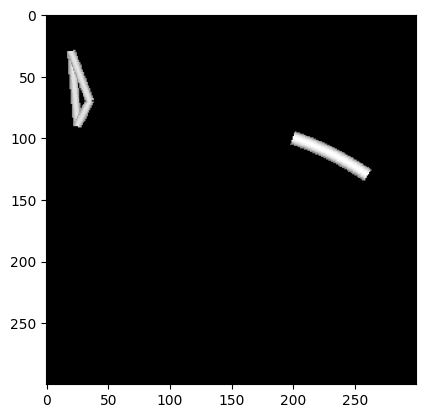

In [25]:
def draw_polyline(im,puntos,radio=2,color=1,flat=True):
    '''
    puntos lista de arrays de 2 elementos o matriz de Nx2
    '''
    
    npuntos=len(puntos)
    
    copia=im.copy()
    for k in range(1,npuntos):
        P0=puntos[k-1]
        P1=puntos[k]
        draw_line(copia,P0,P1,radio,color,flat)

        
    return copia


def draw_spline(im,P0,P1,P2,radio=2,color=1,flat=True):
    puntos=[]
    for t in np.linspace(0,1.0,20):
        p=spline(P0,P1,P2,t)
        puntos.append(p)
    print(puntos)
    copia=im.copy()
    out=draw_polyline(copia,puntos,radio,color,flat)
    return out
    
    

x=np.zeros((300,300))
puntos=np.array([[20,30],
                 [25,90],
                 [35,70],
                 [20,30]])

y=draw_polyline(x,   puntos,radio=3,color=0.9,flat=False)
#z=draw_line(x,puntos[0,:],puntos[1,:],radio=2,color=0.6)

P0=np.array([200,100])
P1=np.array([230,110])
P2=np.array([260,130])
z=draw_spline(y,P0,P1,P2,radio=5,color=1,flat=False)
_=plt.imshow(z,clim=(0,1),cmap='gray')

In [18]:
print(puntos.shape)

(2, 73)


In [72]:
import random

sampleList = [100, 200, 300, 400, 500]
 
randomList = random.choices(
  sampleList, weights=(1, 20, 30, 10, 50), k=1)
print(randomList)

[500]
